In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
from IPython.display import display, clear_output
import PIL.Image

import sys
sys.path.append('../tauSWIRcamera')  # Add the path to the directory containing file_to_import.py
from tauSWIRcamera import tauSWIRcamera

In [35]:
hostname = '129.123.5.125'
port = 4000
cam = tauSWIRcamera(hostname, port, "MASTER")
cameraFolder = cam.name

## START CAMERA SETUP ##
1. Analog mode set to: DISABLED
2. External Sync Mode set to: MASTER
3. AGC set to: MANUAL
4. Auto-Exposure set to: DISABLED
5. CMOS bit depth set to: 14-BITS
6. Camera Link bit depth set to: 14-BITS
7. Integration mode set to: UNRESTRICTED
8. FPA Set Point Temperature set to: 20oC
9. Settings set as Power-on Default
## CAMERA SETUP COMPLETED ##


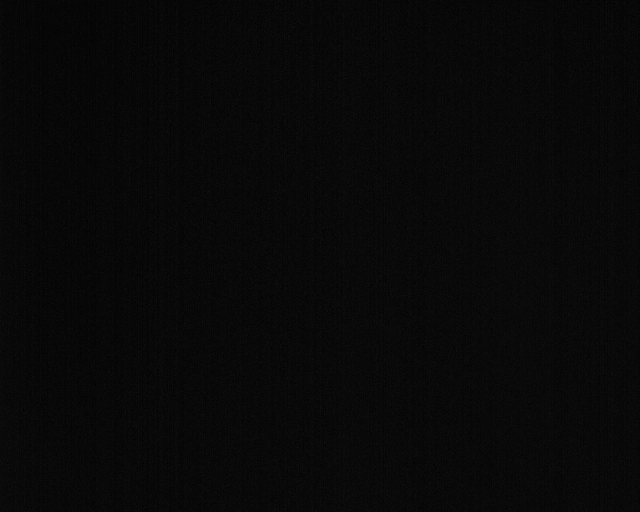

In [37]:
# Define buffer size
buffer_size = 10
frame_buffer = []

try:
    while True:
        # Capture frame-by-frame
        frames = cam.collectFrame(buffer_size)
        # Iterate through each frame in the stack
        for frame in frames:
            # Convert 14-bit to 8-bit for displaying
            frame = (frame >> 6).astype(np.uint8)
            # Append frame to buffer
            frame_buffer.append(frame)
            
            # If buffer exceeds the defined size, remove the oldest frame
            if len(frame_buffer) > buffer_size:
                frame_buffer.pop(0)
            
            # Display frames in the buffer
            for f in frame_buffer:
                img = PIL.Image.fromarray(f)
                display(img)
                clear_output(wait=True)
        
except KeyboardInterrupt:
    pass
finally:
    cv2.destroyAllWindows()